epoch 1/2  iter 100/1200 loss: 0.3946232497692108
epoch 1/2  iter 200/1200 loss: 0.48151737451553345
epoch 1/2  iter 300/1200 loss: 0.0717727392911911
epoch 1/2  iter 400/1200 loss: 0.0676935464143753
epoch 1/2  iter 500/1200 loss: 0.22332312166690826
epoch 1/2  iter 600/1200 loss: 0.13912798464298248
epoch 1/2  iter 700/1200 loss: 0.23195143043994904
epoch 1/2  iter 800/1200 loss: 0.0805218517780304
epoch 1/2  iter 900/1200 loss: 0.038279514759778976
epoch 1/2  iter 1000/1200 loss: 0.0805242508649826
epoch 1/2  iter 1100/1200 loss: 0.19609564542770386
epoch 1/2  iter 1200/1200 loss: 0.36633169651031494
epoch 2/2  iter 100/1200 loss: 0.14390993118286133
epoch 2/2  iter 200/1200 loss: 0.13813476264476776
epoch 2/2  iter 300/1200 loss: 0.14215187728405
epoch 2/2  iter 400/1200 loss: 0.17001992464065552
epoch 2/2  iter 500/1200 loss: 0.2066052407026291
epoch 2/2  iter 600/1200 loss: 0.16535484790802002
epoch 2/2  iter 700/1200 loss: 0.11932291835546494
epoch 2/2  iter 800/1200 loss: 0.296

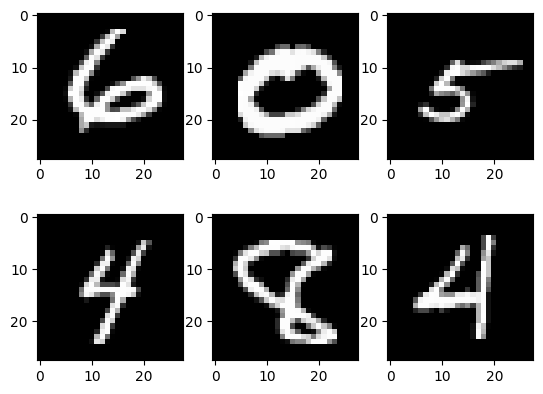

In [33]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader
import numpy as np

#hyper_parameter
input_size=784 #28 x 28
hidden_size=100
num_classes=10 #0 to 10
num_epochs=2
batch_size=50
learning_rate=0.01
 
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

train_loader=DataLoader(dataset=train_dataset,shuffle=True,batch_size=batch_size)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size)

examples=iter(train_loader)
samples,labels=next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')

#plt.show()

class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet, self).__init__()
        self.l1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_size,num_classes)

    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out
    
model=NeuralNet(input_size,hidden_size,num_classes)

#loss and optimization
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

#training loop
n_total_steps=len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images=images.reshape(-1,784)

        #forward
        outputs=model(images)
        loss=criterion(outputs,labels)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100==0:
            print(f'epoch {epoch+1}/{num_epochs}  iter {i+1}/{n_total_steps} loss: {loss}')

with torch.no_grad():
    n_correct=0
    n_samples=0
    n_labels=torch.tensor([])
    n_outputs=torch.tensor([])
    for images,labels in test_loader:
        images=images.reshape(-1,784)
        outputs=model(images)
        n_labels=torch.cat((n_labels,labels))
        n_outputs=torch.cat((n_outputs,outputs))
        #value,index
        _,predictions=torch.max(outputs,1)
        n_samples+=labels.shape[0]
        n_correct+=(predictions==labels).sum().item()


for i in range(n_samples):
    print(f'labels {n_labels[i]}  prediction: f{torch.argmax(n_outputs[i]).item()}')

acc=n_correct*100.0/n_samples

print(f'accuracy: {acc}')
